In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [150]:
import torch
torch.__version__

'1.11.0+cpu'

In [151]:
import numpy as np
lst=[3,4,5]
arr=np.array(lst)
arr


array([3, 4, 5])

In [152]:
tensors=torch.from_numpy(arr)
tensors

tensor([3, 4, 5])

In [153]:
tensor_arr=torch.tensor(arr)#data got copied while changing
tensor_arr

tensor([3, 4, 5])

Diabetes data set

In [154]:
df=pd.read_csv("../input/diabetes-data-set/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [155]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [156]:
import seaborn as sns

In [157]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

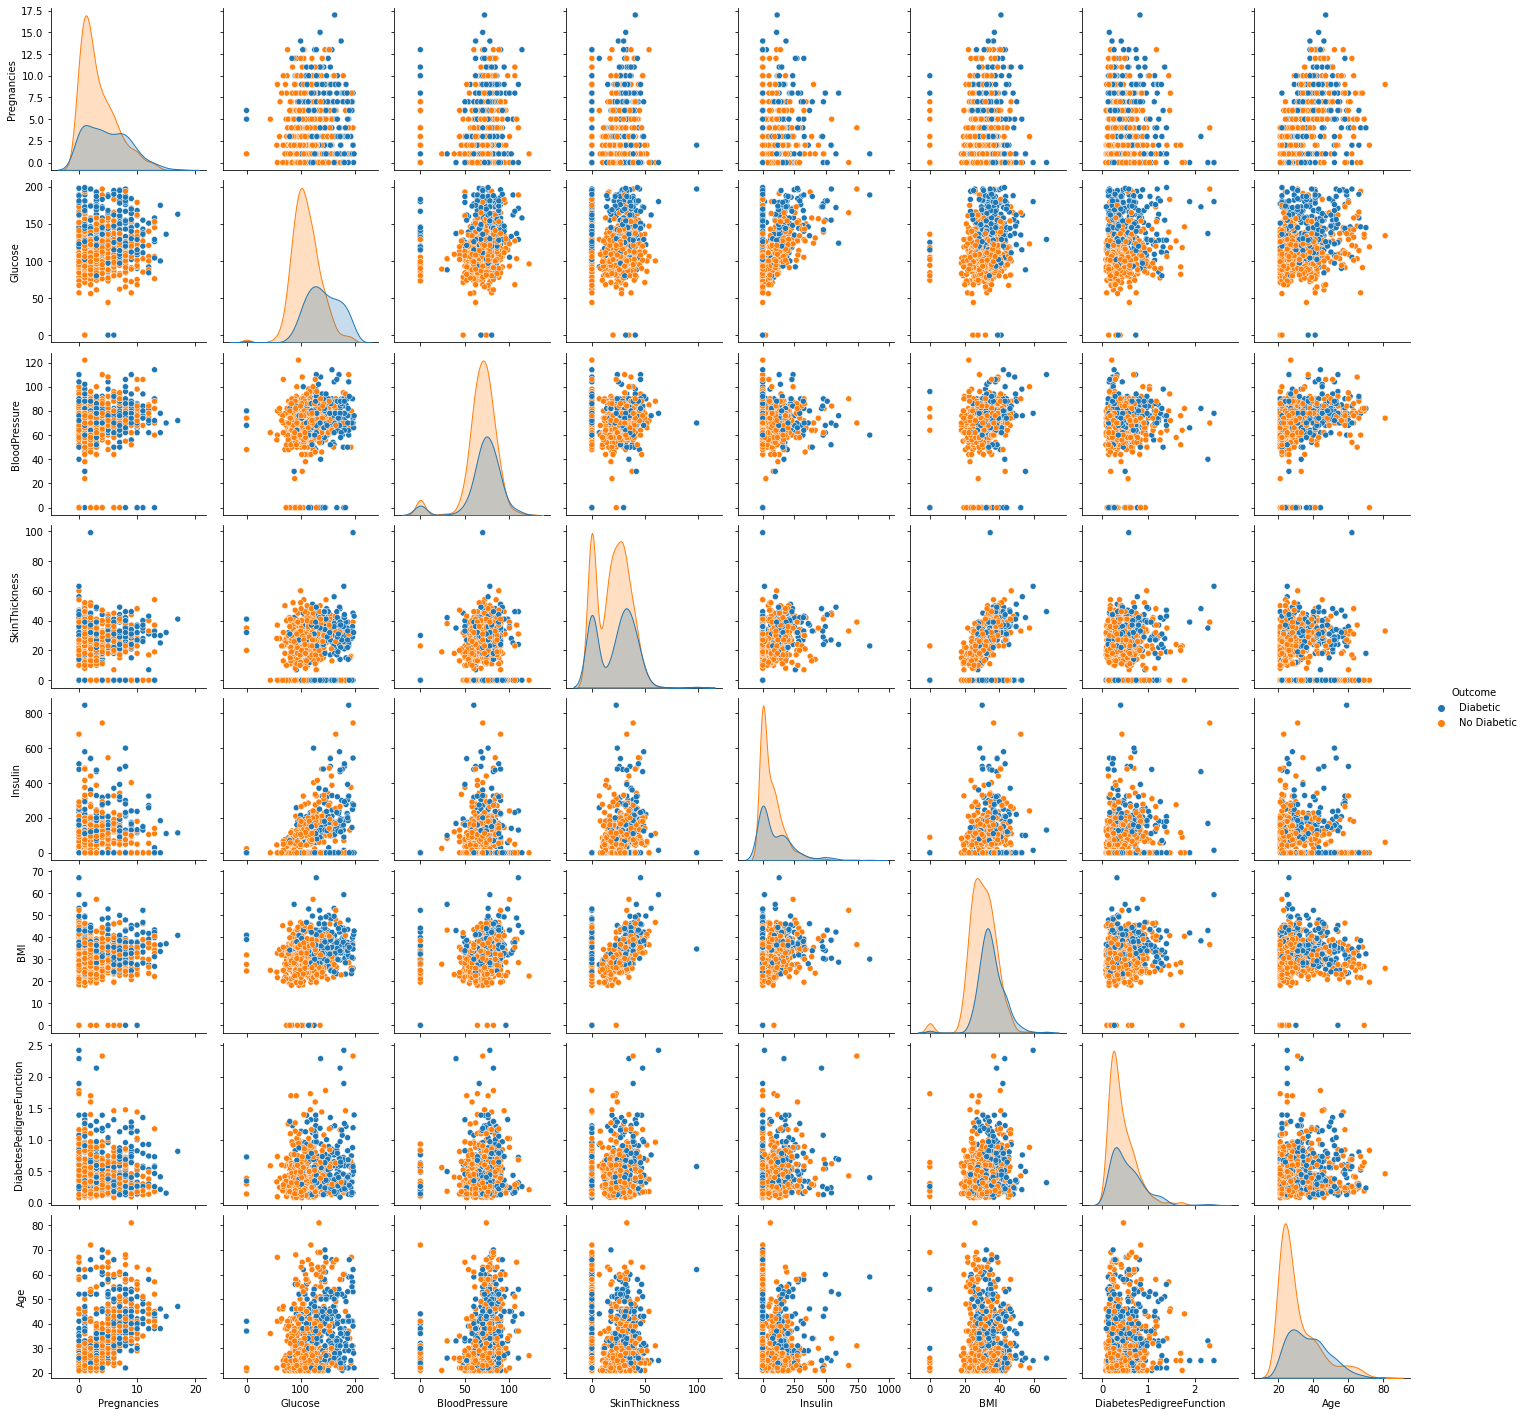

In [158]:
sns.pairplot(df,hue="Outcome")

In [159]:
df=pd.read_csv('../input/diabetes-data-set/diabetes.csv')
from sklearn.model_selection import train_test_split
X=df.drop("Outcome",axis=1).values 
y=df["Outcome"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [160]:
# creating tensors
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

In [161]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [162]:
df.shape

(768, 9)

In [163]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x
# class ANN_Model(nn.Module):
#     def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
#         super().__init__()
#         self.f_connected1=nn.Linear(input_features,hidden1)
#         self.f_connected2=nn.Linear(hidden1,hidden2)
#         self.out=nn.Linear(hidden2,out_features)
#     def forward(self,x):
#         x=F.relu(self.f_connected1(x))
#         x=F.relu(self.f_connected2(x))
#         x=self.out(x)
#         return x    
        

In [164]:
torch.manual_seed(20)
model=ANN_Model()

In [165]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [166]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [167]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("epoch number : {} and loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch number : 1 and loss : 3.6101794242858887
epoch number : 11 and loss : 0.7830833196640015
epoch number : 21 and loss : 0.6043877601623535
epoch number : 31 and loss : 0.5962328314781189
epoch number : 41 and loss : 0.5706728100776672
epoch number : 51 and loss : 0.5614360570907593
epoch number : 61 and loss : 0.5488684773445129
epoch number : 71 and loss : 0.5395093560218811
epoch number : 81 and loss : 0.530659556388855
epoch number : 91 and loss : 0.5239781141281128
epoch number : 101 and loss : 0.5179604291915894
epoch number : 111 and loss : 0.5128828287124634
epoch number : 121 and loss : 0.5073860883712769
epoch number : 131 and loss : 0.502051591873169
epoch number : 141 and loss : 0.4958978593349457
epoch number : 151 and loss : 0.4893852472305298
epoch number : 161 and loss : 0.48409727215766907
epoch number : 171 and loss : 0.48061472177505493
epoch number : 181 and loss : 0.4747682213783264
epoch number : 191 and loss : 0.47021299600601196
epoch number : 201 and loss : 

In [168]:
# plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

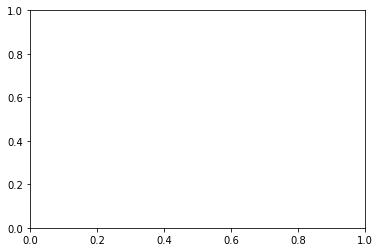

In [171]:
plt.plot([i for i in range(epochs)],final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [172]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model.forward(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
1
0
1
0
1
0
1
0
0
1
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
1
1
0
0
1
0
0
0
1
1
1
1
0


In [173]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[69, 27],
       [21, 37]])

Text(69.0, 0.5, 'predicted Values')

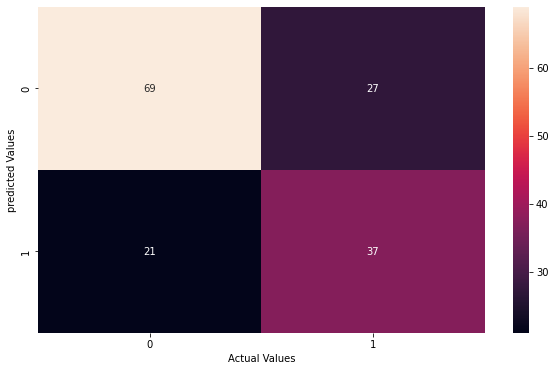

In [174]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Values")
plt.ylabel("predicted Values")

In [175]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.6883116883116883

In [178]:
torch.save(model,"diabetes.pt")

In [179]:
model=torch.load("diabetes.pt")

In [183]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [184]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [191]:
lis1=[6.7,123.0,34.0,45.6,12.6,0.111,0.9,0.0]
new_data=torch.tensor(lis1)

In [192]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())
    

tensor([0.3965, 0.5252])
1
